Data split: Training samples=216, Testing samples=54

--- Model Evaluation (Logistic Regression) ---
Accuracy: 0.8519

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



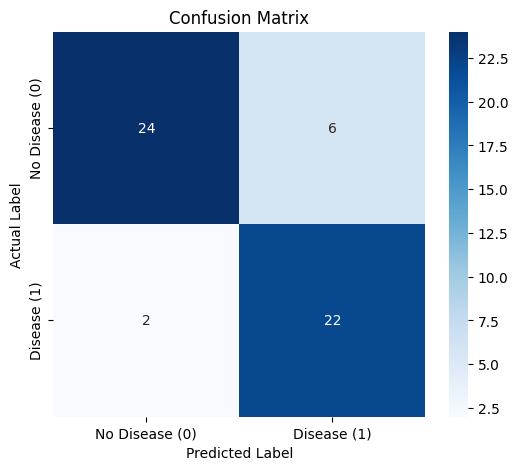

In [1]:
import pandas as pd
# Function to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Tool to normalize feature scales
from sklearn.preprocessing import StandardScaler
# The chosen ML model for binary classification
from sklearn.linear_model import LogisticRegression
# Metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file name
file_name = "Heart.csv"

# --- 1. Load Data ---
df = pd.read_csv(file_name)

# --- 2. Prepare Data (Feature Selection) ---
# X contains all feature columns (all columns EXCEPT HeartDisease)
X = df.drop('HeartDisease', axis=1)
# y contains the target variable
y = df['HeartDisease']

# --- 3. Split Data ---
# Split the dataset into training (80%) and testing (20%) sets
# random_state ensures reproducibility
# stratify=y ensures the training and testing sets have the same proportion of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split: Training samples={X_train.shape[0]}, Testing samples={X_test.shape[0]}")

# --- 4. Preprocessing (Scaling) ---
# Initialize the StandardScaler (critical for Logistic Regression)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5. Model Training (Logistic Regression) ---
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# --- 6. Model Evaluation ---
# Predict the target variable for the testing set
y_pred = model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation (Logistic Regression) ---")
print(f"Accuracy: {accuracy:.4f}")

# Print Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()